In [2]:
library(tidyverse)
library(survival)
library(survminer)

# Custom package
library(rutils)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: ggpubr


In [3]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
projects <- c("TCGA-CESC", "TCGA-UCS", "TCGA-UCEC", "TCGA-OV")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")

In [4]:
i <- 1

In [5]:
survival_df <- read_tsv(paste0(dirs$data_dir, "/", unified_dsets[i], "/survival_data.tsv")) %>%
    mutate(vital_status_num = case_when(
        vital_status == "Dead" ~ 1,
        vital_status == "Alive" ~ 0
    )) %>%
    dplyr::select(vital_status_num, everything(), -vital_status) %>%
    dplyr::rename(vital_status = vital_status_num) %>%
    dplyr::filter(!is.na(survival_time), !is.na(vital_status))
head(survival_df)
nrow(survival_df)

Parsed with column specification:
cols(
  vital_status = col_character(),
  days_to_last_follow_up = col_double(),
  days_to_death = col_double(),
  survival_time = col_double(),
  age_at_diagnosis = col_double(),
  age_at_index = col_double(),
  height = col_double(),
  weight = col_double(),
  bmi = col_double(),
  race_american_indian_or_alaska_native = col_double(),
  race_asian = col_double(),
  race_black_or_african_american = col_double(),
  race_native_hawaiian_or_other_pacific_islander = col_double(),
  race_not_reported = col_double(),
  race_white = col_double(),
  ethnicity_hispanic_or_latino = col_double(),
  ethnicity_not_hispanic_or_latino = col_double(),
  ethnicity_not_reported = col_double()
)


vital_status,days_to_last_follow_up,days_to_death,survival_time,age_at_diagnosis,age_at_index,height,weight,bmi,race_american_indian_or_alaska_native,race_asian,race_black_or_african_american,race_native_hawaiian_or_other_pacific_islander,race_not_reported,race_white,ethnicity_hispanic_or_latino,ethnicity_not_hispanic_or_latino,ethnicity_not_reported
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,570,570,16975,46,NA,76,NA,0,0,0,0,0,1,0,0,1
0,854,NA,854,10199,27,NA,31,NA,0,0,0,0,0,1,0,0,1
0,50,NA,50,14842,40,167,105,37.64925,0,0,0,0,0,1,0,1,0
0,483,NA,483,16450,45,173,82,27.39818,0,0,0,0,0,1,0,1,0
1,186,633,633,13253,36,NA,NA,NA,0,0,0,0,0,1,0,1,0
1,NA,3046,3046,24059,65,163,85,31.99217,0,0,0,0,0,1,0,1,0


[1] 259

In [6]:
counts_df <- read_tsv(paste0(dirs$data_dir, "/", unified_dsets[i], "/counts.tsv"))

Parsed with column specification:
cols(
  .default = col_double(),
  Hugo_Symbol = col_character()
)
See spec(...) for full column specifications.


In [9]:
head(survival_df)

vital_status,days_to_last_follow_up,days_to_death,survival_time,age_at_diagnosis,age_at_index,height,weight,bmi,race_american_indian_or_alaska_native,race_asian,race_black_or_african_american,race_native_hawaiian_or_other_pacific_islander,race_not_reported,race_white,ethnicity_hispanic_or_latino,ethnicity_not_hispanic_or_latino,ethnicity_not_reported
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,570,570,16975,46,NA,76,NA,0,0,0,0,0,1,0,0,1
0,854,NA,854,10199,27,NA,31,NA,0,0,0,0,0,1,0,0,1
0,50,NA,50,14842,40,167,105,37.64925,0,0,0,0,0,1,0,1,0
0,483,NA,483,16450,45,173,82,27.39818,0,0,0,0,0,1,0,1,0
1,186,633,633,13253,36,NA,NA,NA,0,0,0,0,0,1,0,1,0
1,NA,3046,3046,24059,65,163,85,31.99217,0,0,0,0,0,1,0,1,0


In [8]:
head(counts_df)

Hugo_Symbol,Entrez_Gene_Id,GTEX-S32W-1626-SM-4AD6G,GTEX-S32W-1526-SM-4AD6Z,GTEX-T5JW-0726-SM-4DM6D,GTEX-TSE9-2826-SM-4DXTF,GTEX-TSE9-2726-SM-4DXSQ,GTEX-TML8-0726-SM-4DXTT,GTEX-S341-1126-SM-4AD6T,GTEX-T6MO-1426-SM-4DM73,⋯,TCGA-VS-A9UV-01A-11R-A42T-07,TCGA-MA-AA43-01A-11R-A42T-07,TCGA-VS-A9UJ-01A-11R-A42T-07,TCGA-C5-A7CM-01A-11R-A33Z-07,TCGA-EA-A3QD-01A-32R-A22U-07,TCGA-EA-A3HR-01A-11R-A213-07,TCGA-VS-A8EK-01A-12R-A37O-07,TCGA-VS-A9UM-01A-11R-A42T-07,TCGA-C5-A1MN-01A-11R-A14Y-07,TCGA-Q1-A6DT-01A-11R-A32P-07
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM208A,23272,2543.54,1934.78,1294.75,1473.59,1428.88,2036.42,2945.62,1992.93,⋯,1858.83,3514.75,1308.29,2684.91,2807.11,6234.90,3028.79,2268.13,3516.53,3662.39
RADIL,55698,432.00,280.00,73.00,401.00,505.00,513.00,616.00,411.00,⋯,4.00,27.00,7.00,14.00,47.00,37.00,190.00,19.00,127.00,12.00
AP1M2,10053,2.00,2.00,708.00,5.00,8.00,3.00,4.00,417.00,⋯,2865.00,871.00,5274.00,4552.00,2505.00,4598.00,4033.00,1999.00,2920.00,1610.00
TAF1,6872,2506.97,1942.75,1086.00,1936.82,1787.00,2049.00,2481.45,1549.95,⋯,1049.99,1810.72,1597.77,1491.00,3054.54,3031.73,3159.00,2054.00,1784.00,2005.72
SIGLEC5,8778,39.69,24.27,12.45,9.74,3.70,8.58,3.72,9.21,⋯,5.12,36.37,8.90,5.19,87.73,60.80,39.19,89.54,14.64,27.11
KLF1,10661,0.00,0.00,2.00,0.00,0.00,1.00,0.00,0.00,⋯,3.00,0.00,3.00,9.00,8.00,6.00,7.00,2.00,5.00,7.00


In [31]:
survival_fit <- survfit(Surv(survival_time, vital_status) ~ 1, data = survival_df)

In [39]:
survival_fit

Call: survfit(formula = Surv(survival_time, vital_status) ~ 1, data = survival_df)

      n  events  median 0.95LCL 0.95UCL 
    259      66    3097    2094      NA 

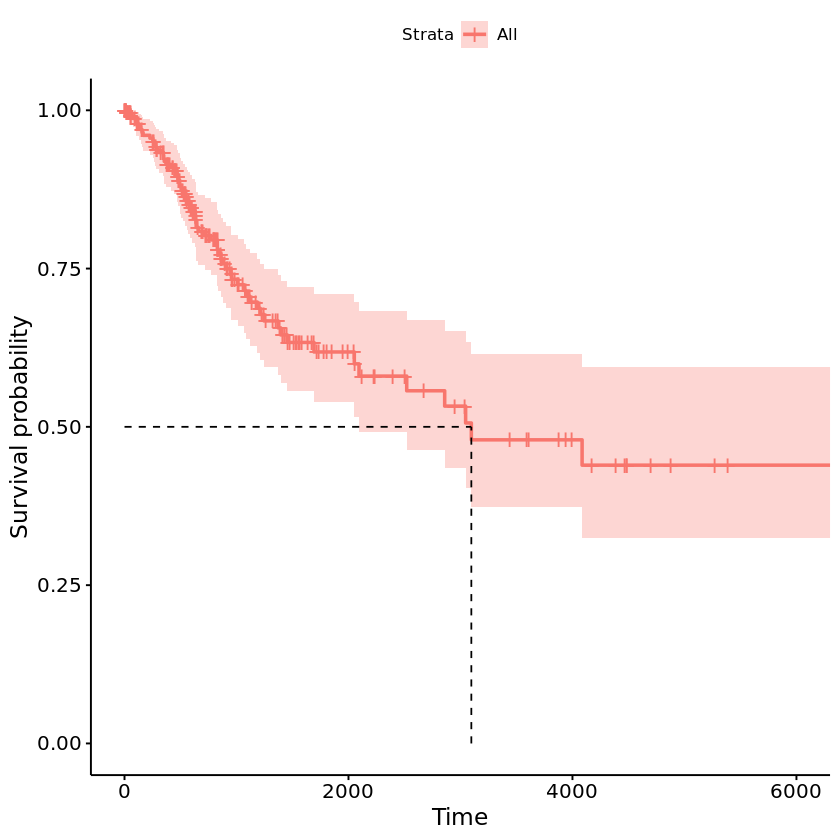

In [43]:
ggsurvplot(survival_fit, data = survival_df, surv.median.line = "hv")